## Kickstarter projects dataset:

- More than 300,000 kickstarter projects

## Columns:
- ID: internal kickstarter id.
- name: name of project - A project is a finite work with a clear goal that you’d like to bring to life.
- category: category.
- main_category: category of campaign.
- currency: currency used to support
- deadline: deadline for crowdfunding.
- goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
- launched: date launched.
- pledged: amount pledged by "crowd".
- state: Current condition the project is in.

In [696]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

In [818]:
df = pd.read_excel('ks-projects-201801.xlsx')

In [819]:
df.drop(columns=['backers', 'country', 'launched'], inplace = True)

In [820]:
df

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,100.0,30000.00
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.0,failed,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.0,failed,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,USD,2014-10-17,50000.0,25.0,canceled,25.0,50000.00
378657,The Tribe,Film & Video,USD,2011-07-19,1500.0,155.0,failed,155.0,1500.00
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,USD,2010-08-16,15000.0,20.0,failed,20.0,15000.00
378659,BioDefense Education Kit,Technology,USD,2016-02-13,15000.0,200.0,failed,200.0,15000.00


## Goal 1: which main category have the most successful projects?

In [825]:
success = df.loc[df['state'] == 'successful', ['main_category', 'state']]

In [827]:
success1 = success.rename(columns={'state': 'Successful projects'})

In [829]:
success1

,main_category,Successful projects
5,Food,successful
6,Food,successful
11,Music,successful
14,Games,successful
18,Music,successful
...,...,...
378642,Games,successful
378644,Design,successful
378646,Publishing,successful
378651,Music,successful


In [831]:
success1_1 = """SELECT main_category, COUNT(*) AS Successful_projects FROM success1
GROUP BY main_category"""

In [833]:
success2 = psql.sqldf(success1_1)

In [834]:
success2

,main_category,Successful_projects
0,Art,11510
1,Comics,5842
2,Crafts,2115
3,Dance,2338
4,Design,10550
5,Fashion,5593
6,Film & Video,23623
7,Food,6085
8,Games,12518
9,Journalism,1012


In [835]:
success3 = success2[['main_category', 'Successful_projects']].sort_values(by = 'Successful_projects', ascending = False)

In [836]:
success3

,main_category,Successful_projects
10,Music,24197
6,Film & Video,23623
8,Games,12518
12,Publishing,12300
0,Art,11510
4,Design,10550
14,Theater,6534
13,Technology,6434
7,Food,6085
1,Comics,5842


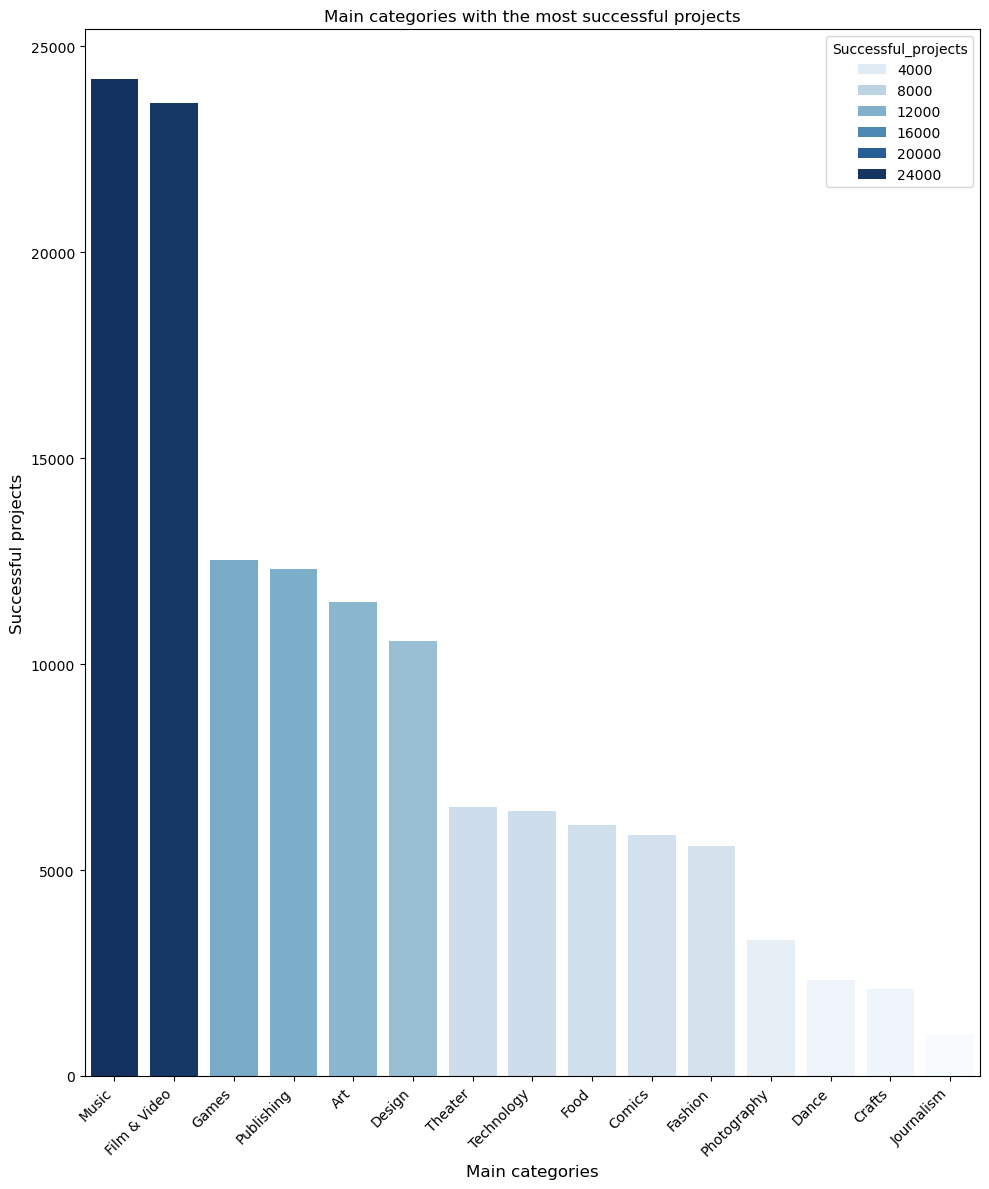

In [837]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = success3, x = success3['main_category'], y = success3['Successful_projects'], 
            hue = success3['Successful_projects'],
           palette = 'Blues')
plt.xlabel('Main categories', size = 12)
plt.ylabel('Successful projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Main categories with the most successful projects', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- We noticed from the bar chart is that the main categories with the most successful projects fall under the Music, Film and video categories, followed by games, publishing, art and Design main categories.
- These categories are the most popular and well-supported on kickstarter, due to their creative and massive appeal, which are great targets for investment.
- Another characteristic is that they offer entertainment ,artistic and emotional value.
- The least successful projects fall under the photography, dance, crafts, journalism categories.
- These categories are more limited and least supported by investors, they require skill, investment and deep learning especially in a professional field like journalism.

## Goal 2: which main category that have the most failed projects?

In [840]:
df.head()

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,100.0,30000.00
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.0,failed,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.0,failed,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,1283.0,19500.00


In [841]:
failed = df.loc[df['state'] == 'failed', ['main_category', 'state']]

In [842]:
failed

,main_category,state
0,Publishing,failed
1,Film & Video,failed
2,Film & Video,failed
3,Music,failed
7,Food,failed
...,...,...
378654,Food,failed
378657,Film & Video,failed
378658,Film & Video,failed
378659,Technology,failed


In [843]:
failed_1 = """SELECT main_category, COUNT(*) AS failed_projects FROM failed
GROUP BY main_category"""

In [844]:
failed1 = psql.sqldf(failed_1)

In [845]:
failed1

,main_category,failed_projects
0,Art,14131
1,Comics,4036
2,Crafts,5703
3,Dance,1235
4,Design,14814
5,Fashion,14182
6,Film & Video,32904
7,Food,15969
8,Games,16003
9,Journalism,3137


In [846]:
failed2 = failed1.sort_values(by = 'failed_projects', ascending = False)

In [847]:
failed2

,main_category,failed_projects
6,Film & Video,32904
12,Publishing,23145
10,Music,21752
13,Technology,20616
8,Games,16003
7,Food,15969
4,Design,14814
5,Fashion,14182
0,Art,14131
11,Photography,6384


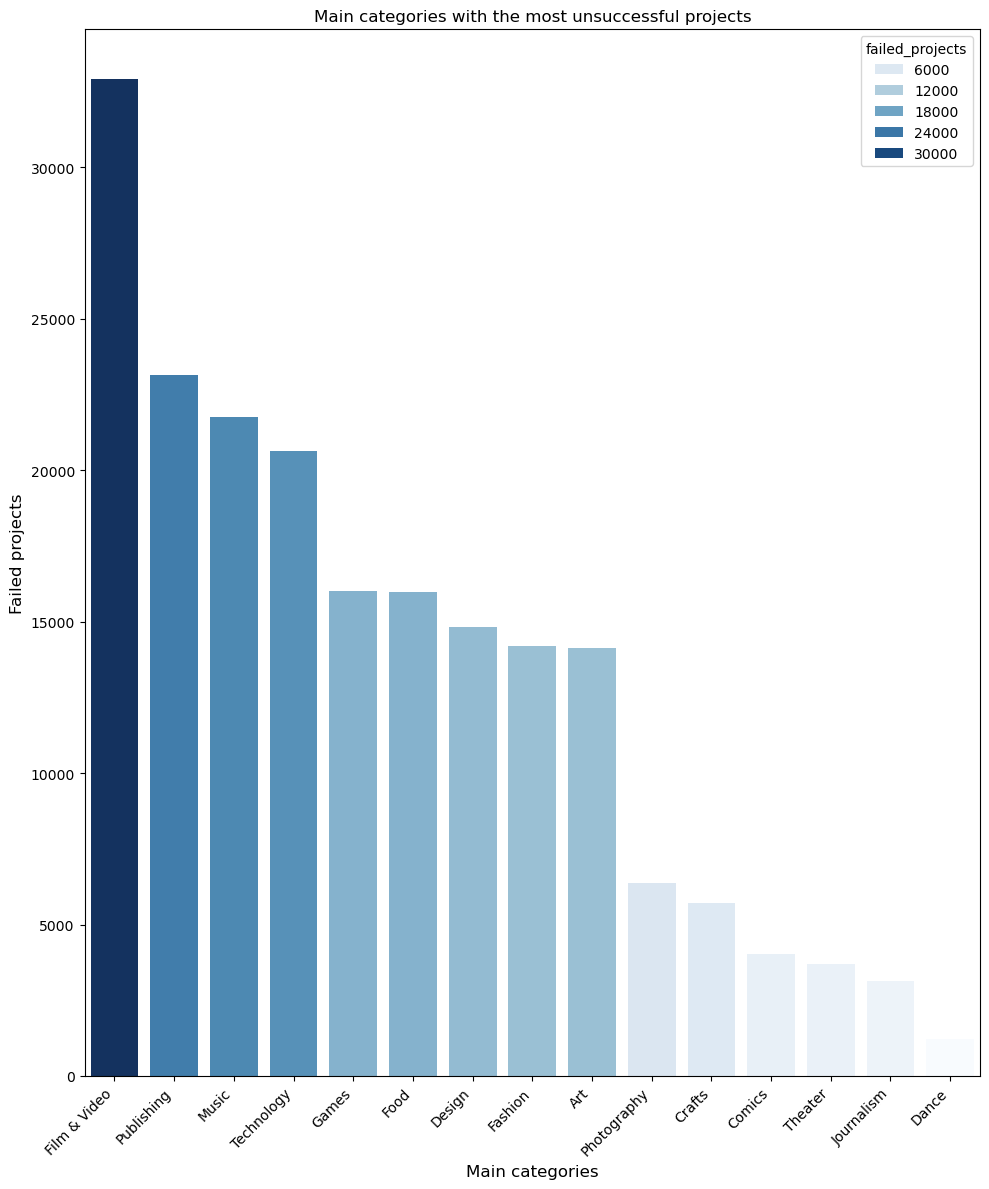

In [848]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = failed2, x = failed2['main_category'], y = failed2['failed_projects'], 
            hue = failed2['failed_projects'],
           palette = 'Blues')
plt.xlabel('Main categories', size = 12)
plt.ylabel('Failed projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Main categories with the most unsuccessful projects', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- We have noticed from the chart is that the most failed projects fall under the film & video category, what is interesting is that  this is the same category with the most successful projects as we have seen from the previous chart.
- this shows that although film and video is a very popular category in kickstarter, it also carries a high level of risk of faliure.
- other categories with failed projects are publishing, music, technology, games, food, design, fashion and art.
- What is interesting is that comics, theater, journalim and dance categories have the least number of failed projects, perhaps due to their limited and niche audiences.

## Goal 3: which main category that have the most canceled projects?

In [851]:
df.head()

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,100.0,30000.00
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.0,failed,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.0,failed,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,1283.0,19500.00


In [852]:
canceled = df.loc[df['state'] == 'canceled', ['main_category', 'state']]

In [853]:
canceled_1 = """SELECT main_category, COUNT(*) AS canceled_projects FROM canceled
GROUP BY main_category"""

In [854]:
canceled1 = psql.sqldf(canceled_1)

In [855]:
canceled1

,main_category,canceled_projects
0,Art,2222
1,Comics,842
2,Crafts,843
3,Dance,163
4,Design,4152
5,Fashion,2650
6,Film & Video,5755
7,Food,2211
8,Games,6202
9,Journalism,523


In [856]:
canceled2 = canceled1.sort_values(by = 'canceled_projects', ascending = False)

In [857]:
canceled2

,main_category,canceled_projects
8,Games,6202
6,Film & Video,5755
13,Technology,4715
4,Design,4152
12,Publishing,3602
10,Music,3305
5,Fashion,2650
0,Art,2222
7,Food,2211
11,Photography,986


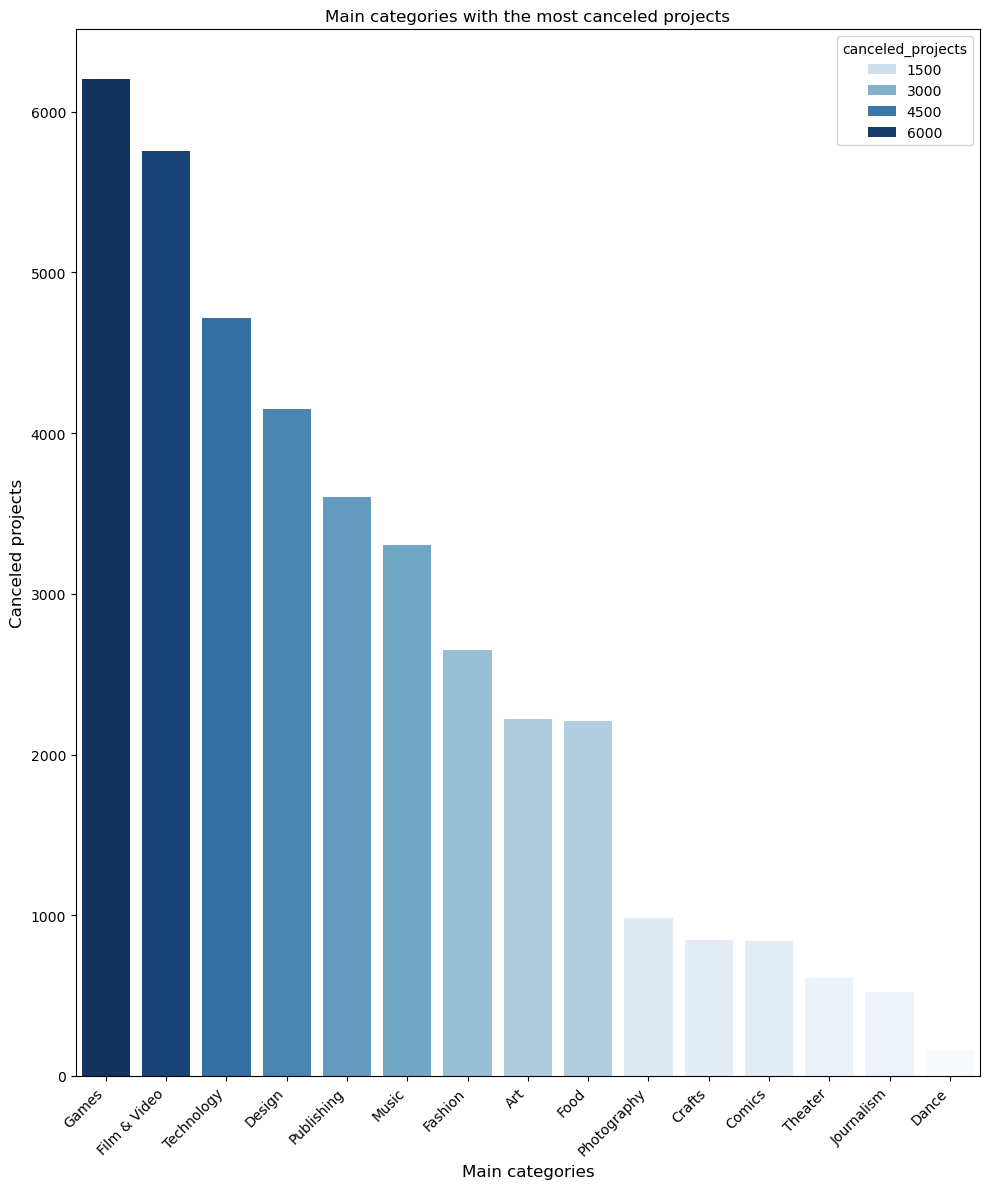

In [858]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = canceled2, x = canceled2['main_category'], y = canceled2['canceled_projects'], 
            hue = canceled2['canceled_projects'],
           palette = 'Blues')
plt.xlabel('Main categories', size = 12)
plt.ylabel('Canceled projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Main categories with the most canceled projects', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- We noticed from the chart that the main category with the most canceled projects falls under the games category, followed by film and video, technology and design.
- Video game projects get canceled due to a variety of factors:
1. Bugs and glitches.
2. Schedulling conflicts and missed deadlines
3. Funding shortfalls where the budget fails to meet the development costs.
- These cancelations show that game development is a high risk field especially on kickstarter.
- Same thing for the film and video, technology categories:
1. Production difficulties.
2. high costs.
3. Unexpected challenges.
- Intrestingly: photography, crafts, comics, theater, journalism and dance categories have the least number of canceled projects due to their professional and artistic nature, which requires specialized expertise.

## Goal 4: which year that has the most successful projects?

In [861]:
df.head(10)

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0.00,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,100.00,30000.00
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.00,failed,220.00,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.00,failed,1.00,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,1283.00,19500.00
5,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,52375.00,successful,52375.00,50000.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,1205.00,successful,1205.00,1000.00
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,2016-03-17,25000.0,453.00,failed,453.00,25000.00
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,USD,2014-05-29,125000.0,8233.00,canceled,8233.00,125000.00
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,6240.57,65000.00


In [862]:
df['Year of deadline'] = df['deadline'].dt.year

In [863]:
df.head()

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0.0,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,100.0,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.0,failed,220.0,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.0,failed,1.0,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,1283.0,19500.00,2015


In [871]:
Year_success = df.loc[df['state'] == 'successful', ['Year of deadline', 'state']]

In [874]:
Year_success

,Year of deadline,state
5,2016,successful
6,2014,successful
11,2013,successful
14,2017,successful
18,2012,successful
...,...,...
378642,2017,successful
378644,2015,successful
378646,2013,successful
378651,2014,successful


In [875]:
Year_success1 = Year_success.rename(columns= {'state': 'successful projects'})

In [876]:
Year_success2 = Year_success1.groupby('Year of deadline')['successful projects'].count().reset_index()

In [877]:
Year_success2

,Year of deadline,successful projects
0,2009,384
1,2010,4008
2,2011,11768
3,2012,18063
4,2013,19198
5,2014,21202
6,2015,21075
7,2016,18824
8,2017,19348
9,2018,86


In [878]:
Year_success3 = Year_success2.sort_values(by = 'successful projects', ascending = False)

In [879]:
Year_success3

,Year of deadline,successful projects
5,2014,21202
6,2015,21075
8,2017,19348
4,2013,19198
7,2016,18824
3,2012,18063
2,2011,11768
1,2010,4008
0,2009,384
9,2018,86


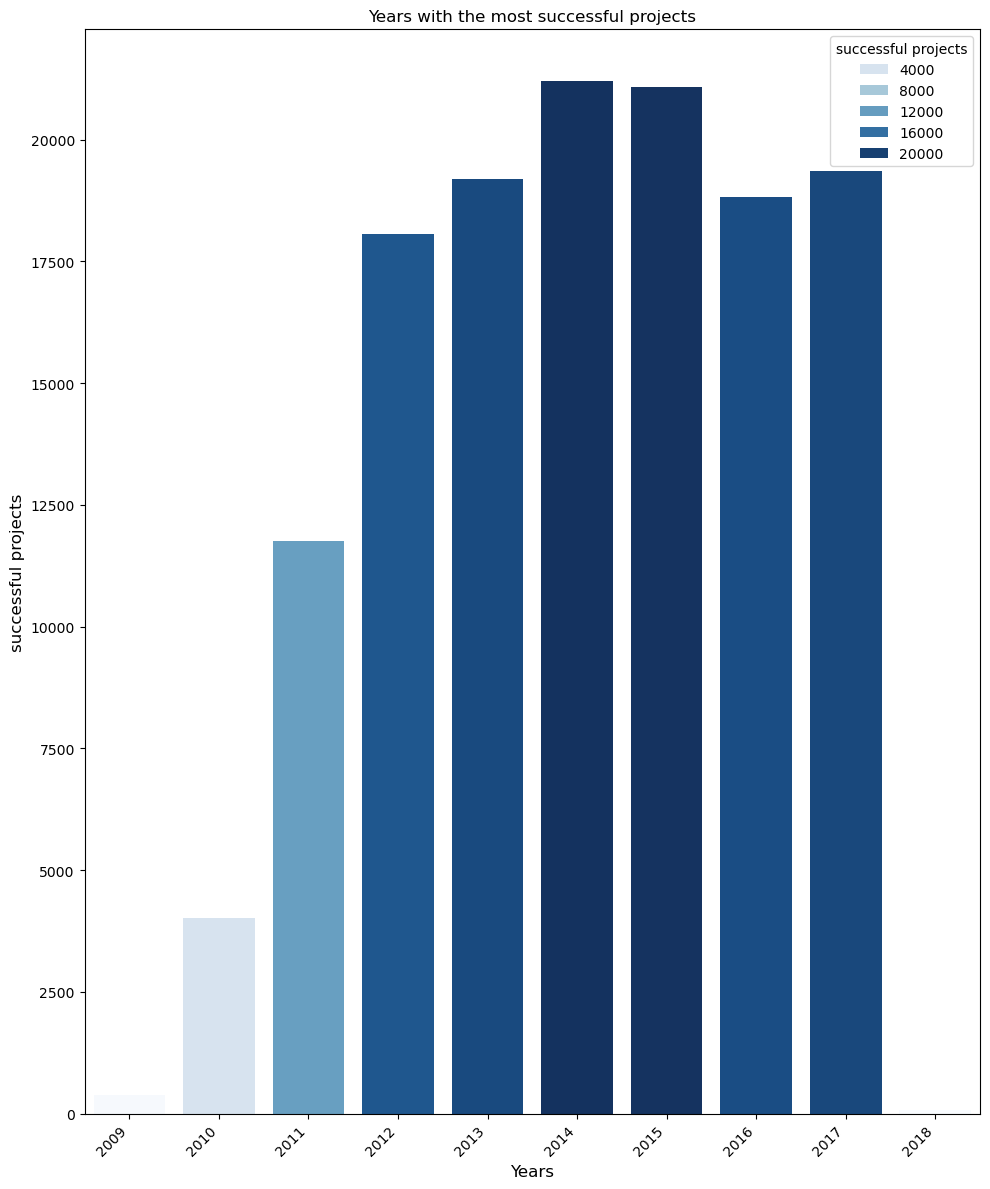

In [880]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = Year_success3, x = Year_success3['Year of deadline'], y = Year_success3['successful projects'], 
            hue = Year_success3['successful projects'],
           palette = 'Blues')
plt.xlabel('Years', size = 12)
plt.ylabel('successful projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Years with the most successful projects', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- In its early years(2009 to 2010), kickstarter had a limited number of successful projects due to being new in the market.
- After this period, there is a consistent increase of successful kickstarter projects starting from 2011 to its peak in 2014 ,2015, 2016 and 2017, indicating kickstarter's popularity and trust in that period.
- After 2017, kickstarter started to decline due to market oversaturation of different start-up projects, increased competition from other platforms and strictier evaluation of project feasibility.
- 2018 had the least number of successful projects indicating that there is an error in the data, it is not logical that there is a sharp decline from 2017 to 2018, worth investigating.

## Goal 5: which year that has the most failed projects?

In [883]:
df.head()

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0.0,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,100.0,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.0,failed,220.0,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.0,failed,1.0,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,1283.0,19500.00,2015


In [884]:
Year_failed = df.loc[df['state'] == 'failed', ['Year of deadline', 'state']]

In [885]:
Year_failed_1 = Year_failed.rename(columns={'state': 'failed projects'})

In [886]:
Year_failed1 = Year_failed_1.groupby('Year of deadline')['failed projects'].count().reset_index()

In [887]:
Year_failed1

,Year of deadline,failed projects
0,2009,410
1,2010,4297
2,2011,11201
3,2012,20760
4,2013,21346
5,2014,37038
6,2015,44378
7,2016,31101
8,2017,27054
9,2018,134


In [888]:
Year_failed2 = Year_failed1.sort_values(by = 'failed projects', ascending = False)

In [889]:
Year_failed2

,Year of deadline,failed projects
6,2015,44378
5,2014,37038
7,2016,31101
8,2017,27054
4,2013,21346
3,2012,20760
2,2011,11201
1,2010,4297
0,2009,410
9,2018,134


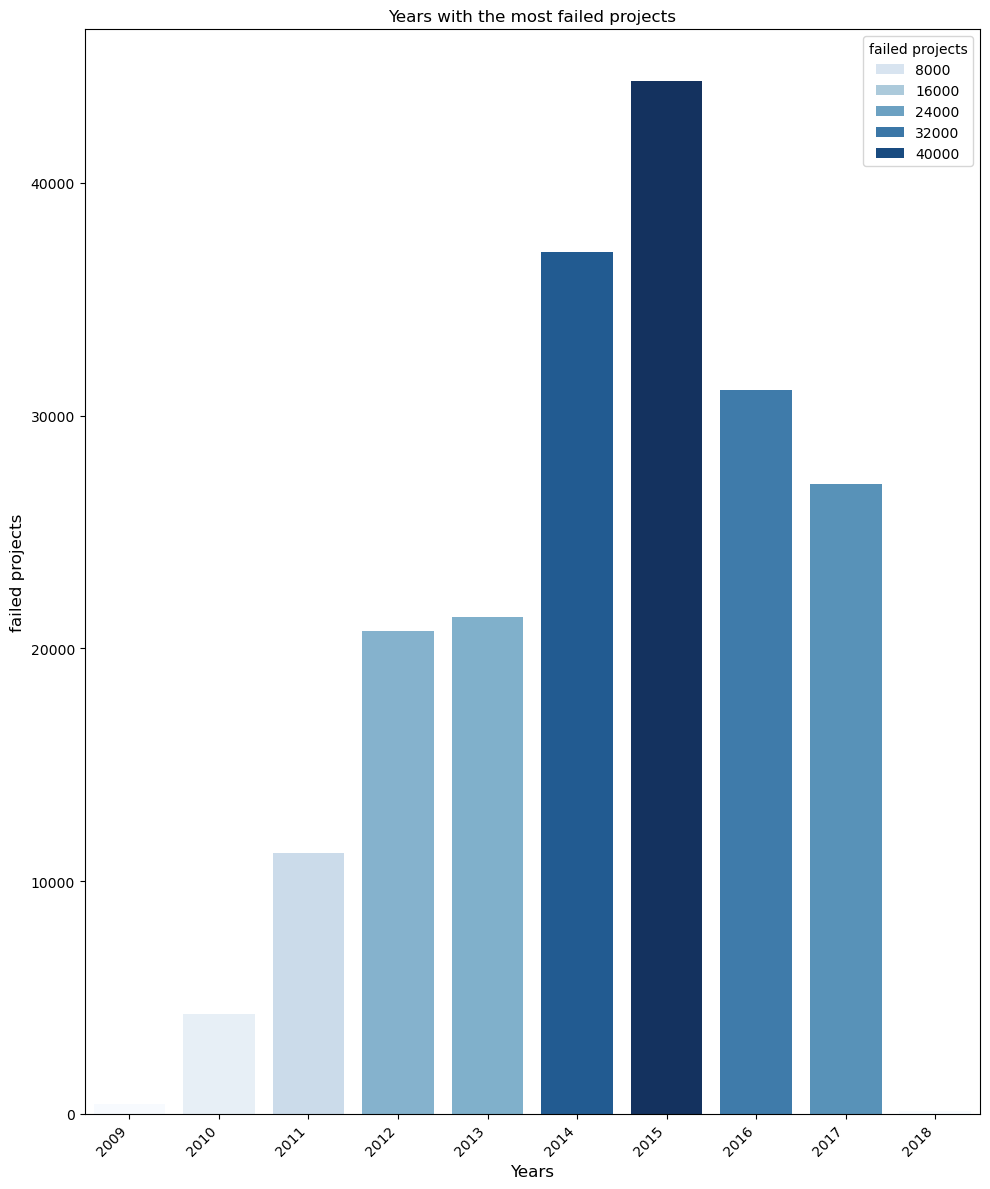

In [890]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = Year_failed2, x = Year_failed2['Year of deadline'], y = Year_failed2['failed projects'], 
            hue = Year_failed2['failed projects'],
           palette = 'Blues')
plt.xlabel('Years', size = 12)
plt.ylabel('failed projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Years with the most failed projects', size = 12)
plt.tight_layout()
plt.show()

# Conclusions:
- We noticed from the chart is that 2014 and 2015 are the peak years for failed projects, interstingly, those are the same peak years for successful kickstarter projects.
- This reflects that even in kickstarter's peak years, not all projects succeeded in reaching their funding goals.
- After 2015, there's a gradual decline in the number of failed projects, which may reflect a more cautious or mature user base, or perhaps less traffic to the platform overall.
- Like the success data, 2018 shows an unrealistically low number of failed projects (134), indicating incomplete or corrupted data for that year. This anomaly requires further investigation or exclusion from the analysis.

## Goal 6: which year that has the most canceled projects?

In [893]:
Year_canceled = df.loc[df['state'] == 'canceled', ['Year of deadline', 'state']]

In [894]:
Year_canceled1 = Year_canceled.rename(columns={'state': 'canceled projects'})

In [895]:
Year_canceled1

,Year of deadline,canceled projects
4,2015,canceled
8,2014,canceled
9,2014,canceled
68,2015,canceled
70,2016,canceled
...,...,...
378640,2014,canceled
378643,2014,canceled
378648,2016,canceled
378655,2014,canceled


In [900]:
Year_canceled2 = Year_canceled1.groupby('Year of deadline')['canceled projects'].count().reset_index()

In [901]:
Year_canceled2

,Year of deadline,canceled projects
0,2009,108
1,2010,785
2,2011,2086
3,2012,2684
4,2013,3574
5,2014,7137
6,2015,8986
7,2016,7187
8,2017,5991
9,2018,241


In [902]:
Year_canceled3 = Year_canceled2.sort_values(by = 'canceled projects', ascending = False)

In [903]:
Year_canceled3

,Year of deadline,canceled projects
6,2015,8986
7,2016,7187
5,2014,7137
8,2017,5991
4,2013,3574
3,2012,2684
2,2011,2086
1,2010,785
9,2018,241
0,2009,108


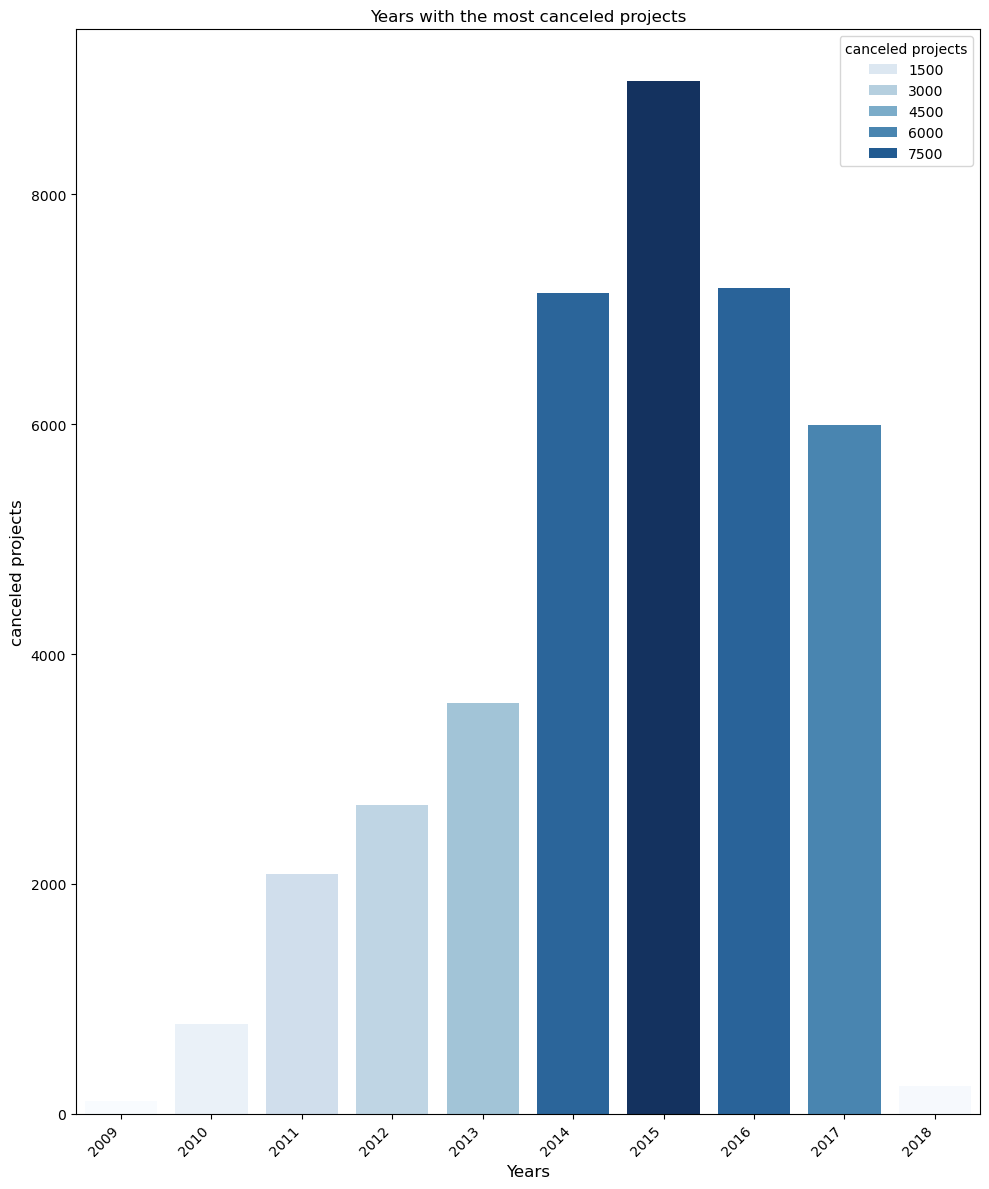

In [904]:
plt.figure(figsize = (10 , 12))
sns.barplot(data = Year_canceled3, x = Year_canceled3['Year of deadline'], y = Year_canceled3['canceled projects'], 
            hue = Year_canceled3['canceled projects'],
           palette = 'Blues')
plt.xlabel('Years', size = 12)
plt.ylabel('canceled projects', size = 12)
plt.xticks(ha = 'right', rotation = 45)
plt.title('Years with the most canceled projects', size = 12)
plt.tight_layout()
plt.show()

## Conclusions:
- 2014, 2015, and 2016 saw the highest number of canceled Kickstarter projects, with 2015 being the peak year (8,986 canceled projects).
- These years also coincide with the platform's peak popularity and activity, suggesting that higher platform usage naturally led to more cancellations due to various reasons:
1. planning issues.
2. overambition.
3. lack of backer interest.
- From 2017 onwards, there is a noticeable decline in canceled projects, which may reflect:
1. Increased experience among creators.
2. Possibly declining usage of Kickstarter overall.
3. Better vetting of ideas before launching.
- 2018 again shows a suspiciously low number of canceled projects (241), similar to the anomaly seen in the successful and failed project data. This strongly suggests incomplete or corrupted data for that year and should be further investigated or excluded from trend analysis.
- The trend overall mirrors platform activity: more users = more cancellations, not necessarily worse quality — just more volume.

In [906]:
df.head(10)

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0.00,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,100.00,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.00,failed,220.00,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.00,failed,1.00,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,1283.00,19500.00,2015
5,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,52375.00,successful,52375.00,50000.00,2016
6,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,1205.00,successful,1205.00,1000.00,2014
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,2016-03-17,25000.0,453.00,failed,453.00,25000.00,2016
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,USD,2014-05-29,125000.0,8233.00,canceled,8233.00,125000.00,2014
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,6240.57,65000.00,2014


## Goal 7: Goal vs pledged: trend analysis between project funding goals and pledged amounts

In [908]:
Goal_vs_pledged = df[['goal', 'pledged']]

In [909]:
Goal_vs_pledged

,goal,pledged
0,1000.0,0.0
1,30000.0,2421.0
2,45000.0,220.0
3,5000.0,1.0
4,19500.0,1283.0
...,...,...
378656,50000.0,25.0
378657,1500.0,155.0
378658,15000.0,20.0
378659,15000.0,200.0


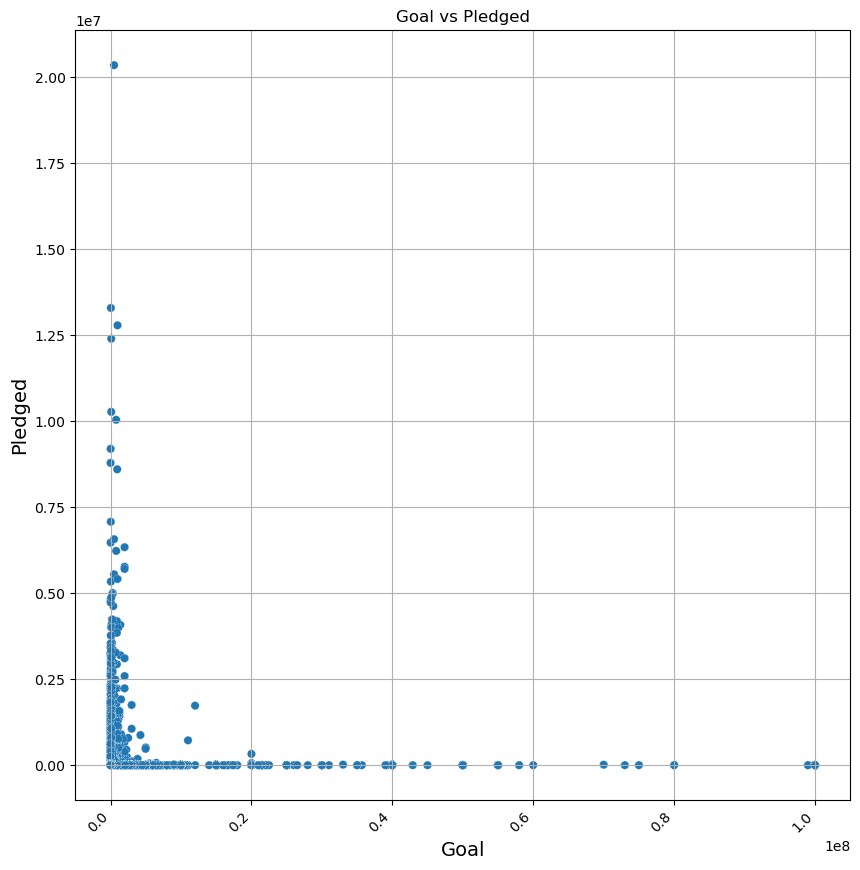

In [910]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=Goal_vs_pledged, x=Goal_vs_pledged['goal'], y=Goal_vs_pledged['pledged'], linestyle = ':')
plt.grid()
plt.xlabel('Goal', size = 14)
plt.xticks(ha = 'right', rotation = 45)
plt.ylabel('Pledged', size = 14)
plt.title('Goal vs Pledged')
plt.show()

## Conclusions:
- Both Goals and pledged columns have a conistent positive relationship.
- Projects with higher funding goals tend to receive higher pledged amounts, indicating proportional funding behavior.
- However, the variability in pledged amounts also increases with higher goals, suggesting some large-goal projects may receive much more or less than their target.

In [912]:
df.head(10)

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0.00,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,100.00,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.00,failed,220.00,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.00,failed,1.00,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,1283.00,19500.00,2015
5,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,52375.00,successful,52375.00,50000.00,2016
6,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,1205.00,successful,1205.00,1000.00,2014
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,2016-03-17,25000.0,453.00,failed,453.00,25000.00,2016
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,USD,2014-05-29,125000.0,8233.00,canceled,8233.00,125000.00,2014
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,6240.57,65000.00,2014


## Goal 8: Goal vs pledged in US dollars : trend analysis between project funding goals and pledged amounts in US dollars

In [915]:
Goal_vs_pledged_usd = df[['usd_goal_real', 'usd pledged']]

In [916]:
Goal_vs_pledged_usd

,usd_goal_real,usd pledged
0,1533.95,0.0
1,30000.00,100.0
2,45000.00,220.0
3,5000.00,1.0
4,19500.00,1283.0
...,...,...
378656,50000.00,25.0
378657,1500.00,155.0
378658,15000.00,20.0
378659,15000.00,200.0


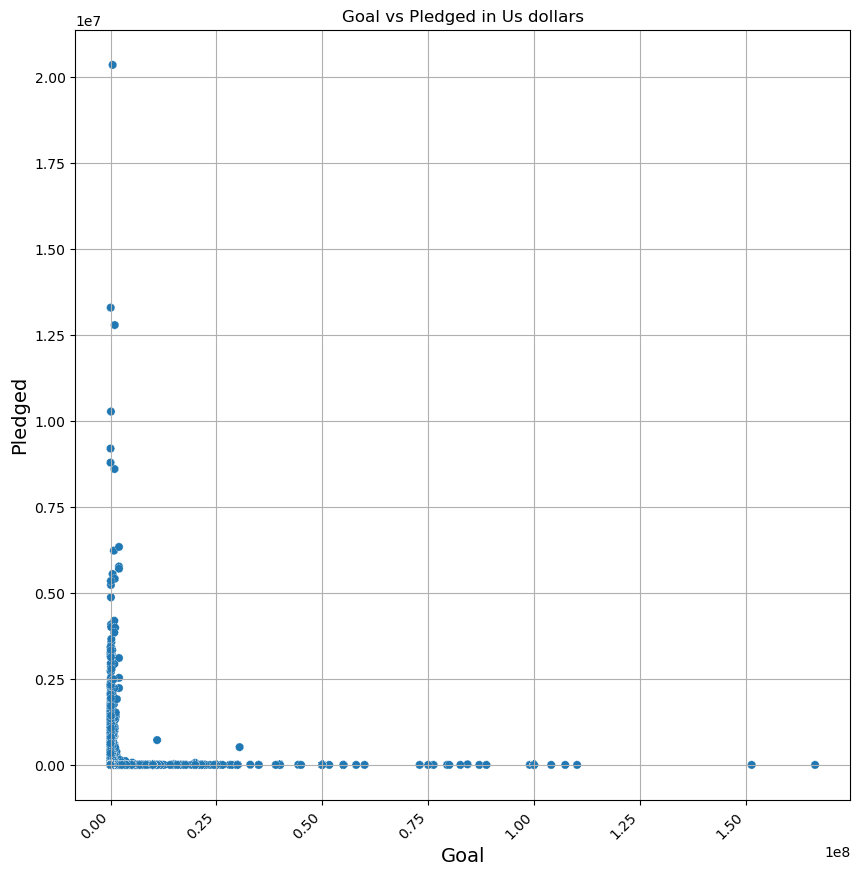

In [917]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=Goal_vs_pledged_usd, x=Goal_vs_pledged_usd['usd_goal_real'], y=Goal_vs_pledged_usd['usd pledged'], linestyle = ':')
plt.grid()
plt.xlabel('Goal', size = 14)
plt.xticks(ha = 'right', rotation = 45)
plt.ylabel('Pledged', size = 14)
plt.title('Goal vs Pledged in Us dollars')
plt.show()

# Conclusions:
- Like the previous chart, there is a consitent positive relationship between usd_goals_real and usd pledged columns.
- Projects with higher funding goals tend to receive higher pledged amounts, indicating proportional funding behavior.
- However, the variability in pledged amounts also increases with higher goals, suggesting some large-goal projects may receive much more or less than their target.

## Goal 9: What factors that determines a project success?

In [923]:
df.head(10)

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0.00,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,100.00,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.00,failed,220.00,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.00,failed,1.00,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,1283.00,19500.00,2015
5,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,52375.00,successful,52375.00,50000.00,2016
6,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,1205.00,successful,1205.00,1000.00,2014
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,2016-03-17,25000.0,453.00,failed,453.00,25000.00,2016
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,USD,2014-05-29,125000.0,8233.00,canceled,8233.00,125000.00,2014
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,6240.57,65000.00,2014


In [925]:
factor_success_general = df.loc[df['state'] == 'successful', ['state','goal', 'pledged']]

In [927]:
factor_success_general1 = factor_success_general.rename(columns = {'state':'successful'})

In [930]:
factor_success_general1

,successful,goal,pledged
5,successful,50000.0,52375.00
6,successful,1000.0,1205.00
11,successful,12500.0,12700.00
14,successful,5000.0,94175.00
18,successful,250.0,250.00
...,...,...,...
378642,successful,1000.0,1246.00
378644,successful,3500.0,6169.00
378646,successful,950.0,1732.02
378651,successful,5000.0,5501.00


In [931]:
factor_success_general1.head(10)

,successful,goal,pledged
5,successful,50000.0,52375.00
6,successful,1000.0,1205.00
11,successful,12500.0,12700.00
14,successful,5000.0,94175.00
18,successful,250.0,250.00
20,successful,20000.0,34268.00
24,successful,175.0,701.66
25,successful,10000.0,15827.00
27,successful,17757.0,48905.00
28,successful,100.0,112.38


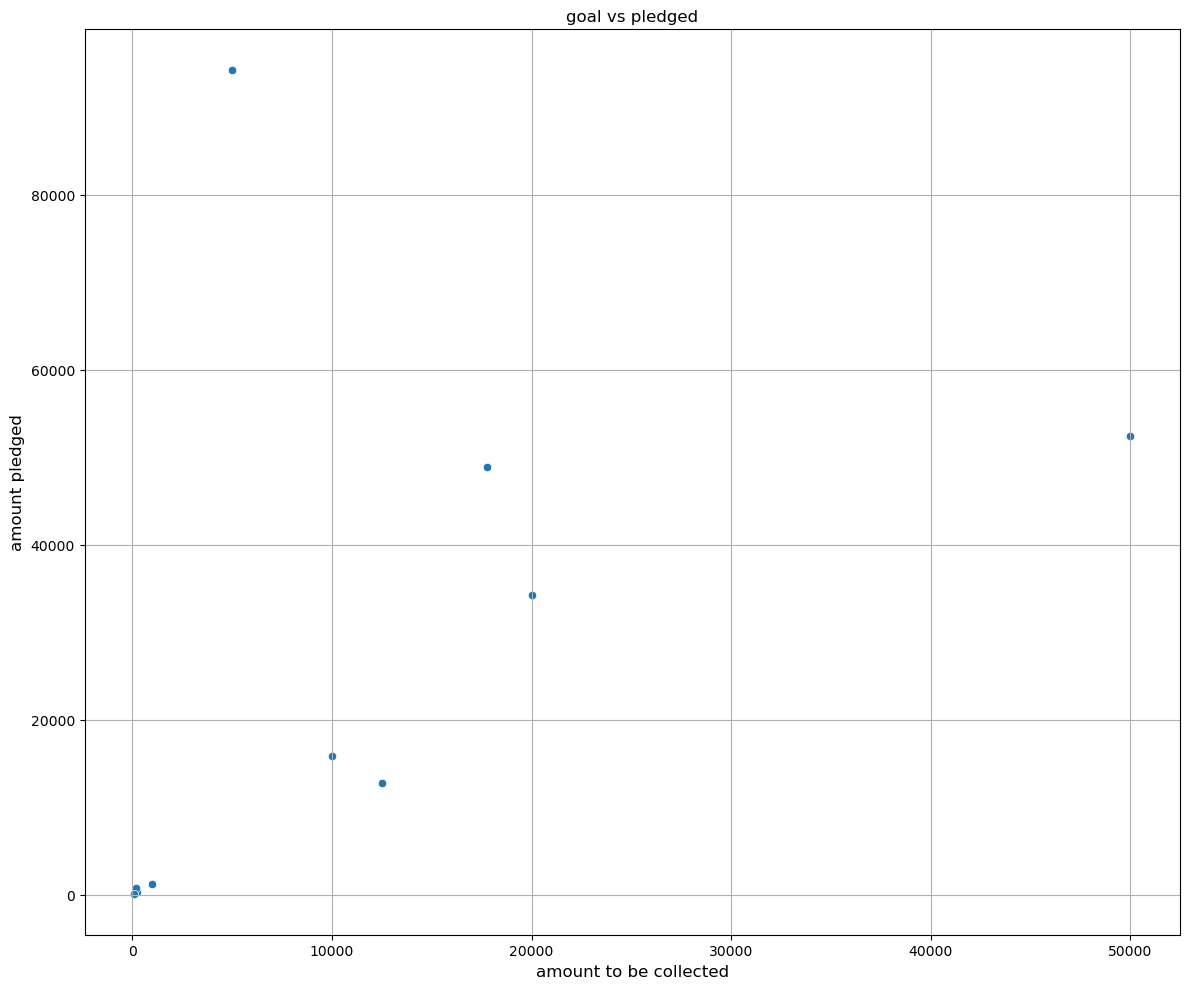

In [932]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data = factor_success_general1, x = factor_success_general1['goal'][:10], y = factor_success_general1['pledged'][:10])
plt.xlabel('amount to be collected', size = 12)
plt.ylabel('amount pledged', size = 12)
plt.title('goal vs pledged', size = 12)
plt.tight_layout()
plt.grid()
plt.show()

## Conclusions:
- When the amount of funds pledged is more than the required amount(goal column), the more successful the project, this reflects: public interest and effective marketing.

In [934]:
factor_success_usd = df.loc[df['state'] == 'successful', ['state','usd_goal_real', 'usd pledged']]

In [935]:
factor_success_usd1 = factor_success_usd.rename(columns={'state': 'successful'})

In [936]:
factor_success_usd1

,successful,usd_goal_real,usd pledged
5,successful,50000.00,52375.00
6,successful,1000.00,1205.00
11,successful,12500.00,12700.00
14,successful,6469.73,57763.78
18,successful,250.00,250.00
...,...,...,...
378642,successful,1165.70,66.72
378644,successful,3500.00,6169.00
378646,successful,950.00,1732.02
378651,successful,4529.81,5019.92


In [937]:
factor_success_usd1.head(10)

,successful,usd_goal_real,usd pledged
5,successful,50000.00,52375.00
6,successful,1000.00,1205.00
11,successful,12500.00,12700.00
14,successful,6469.73,57763.78
18,successful,250.00,250.00
20,successful,20000.00,34268.00
24,successful,175.00,701.66
25,successful,10000.00,15827.00
27,successful,15313.04,43203.25
28,successful,142.91,167.70


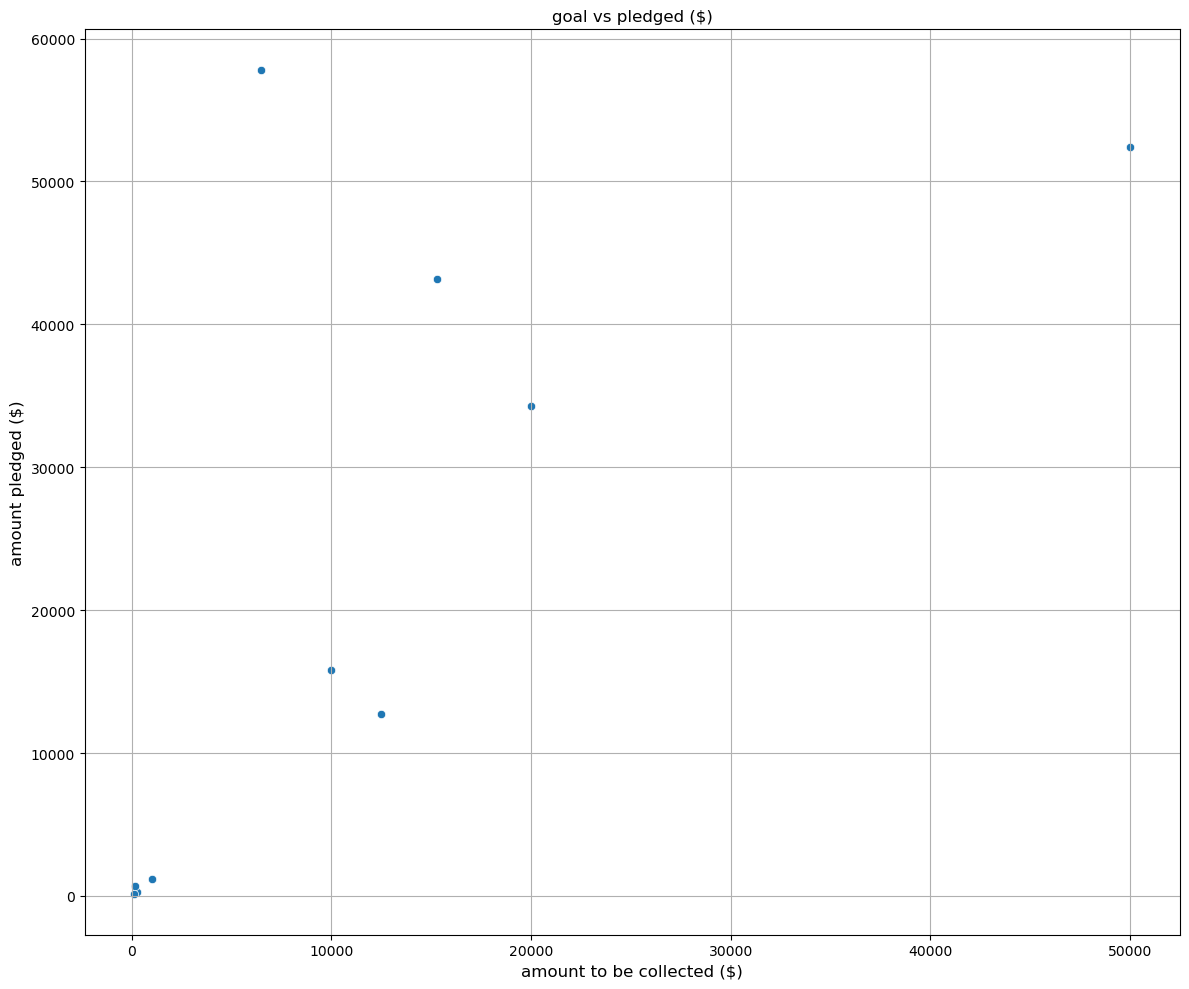

In [938]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data = factor_success_usd1, x = factor_success_usd1['usd_goal_real'][:10], y = factor_success_usd1['usd pledged'][:10])
plt.xlabel('amount to be collected ($)', size = 12)
plt.ylabel('amount pledged ($)', size = 12)
plt.title('goal vs pledged ($)', size = 12)
plt.tight_layout()
plt.grid()
plt.show()

# Conclusions:
- there's a hugh anoamaly, in row 18 pledged amount = required amount(goal), in row 378642 pledged amount < required amount(goal), maybe some rows have the same problems, requires investigation.
- Other than that, just like the previous chart, the more the amount of funds pledged, the more successful the project.

In [952]:
df.head(10)

,name,main_category,currency,deadline,goal,pledged,state,usd pledged,usd_goal_real,Year of deadline
0,The Songs of Adelaide & Abullah,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0.00,1533.95,2015
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,100.00,30000.00,2017
2,Where is Hank?,Film & Video,USD,2013-02-26,45000.0,220.00,failed,220.00,45000.00,2013
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,1.00,failed,1.00,5000.00,2012
4,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,1283.00,19500.00,2015
5,Monarch Espresso Bar,Food,USD,2016-04-01,50000.0,52375.00,successful,52375.00,50000.00,2016
6,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,1205.00,successful,1205.00,1000.00,2014
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,USD,2016-03-17,25000.0,453.00,failed,453.00,25000.00,2016
8,SPIN - Premium Retractable In-Ear Headphones w...,Design,USD,2014-05-29,125000.0,8233.00,canceled,8233.00,125000.00,2014
9,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,6240.57,65000.00,2014
